
## 노트북 커버 다음 주제

    - 결측값 분석
    - 상관관계 분석
    - 최고 기여 변수(XGBoost를 통해)
    - 상관관계 분석
    - 다중공선성 분석(Multicollinearity Analysis)
    - 일변량 분석(Univariate Analysis)
    - 이변량 분석(Bivariate Analysis)


## Global Imports ##

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno

from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

## Reading In Dataset ##

In [2]:
train = pd.read_csv('./input/train_2016_v2.csv', parse_dates=["transactiondate"])
properties = pd.read_csv('./input/properties_2016.csv')

## Shape Of The Dataset ##

In [3]:
print ("Shape Of Train: ",train.shape)
print ("Shape Of Properties: ",properties.shape)

Shape Of Train:  (90275, 3)
Shape Of Properties:  (2985217, 58)


## Lets Merge Train And Properties To Facilitate EDA ##

In [4]:
merged = pd.merge(train, properties, on="parcelid", how="left")

## First Few Rows Of Data ##

In [5]:
merged.head(3).transpose()

,0,1,2
parcelid,11016594,14366692,12098116
logerror,0.0276,-0.1684,-0.004
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
airconditioningtypeid,1.0,NaN,1.0
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,2.0,3.5,3.0
bedroomcnt,3.0,4.0,2.0
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,4.0,NaN,4.0


## Visualizing Datatypes ##

In [6]:
dataTypeDf = pd.DataFrame(merged.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
dataTypeDf

,variableType,count
0,float64,53
1,object,5
2,int64,1
3,datetime64[ns],1


In [7]:
dataTypeDf = pd.DataFrame(merged.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf, x ='variableType', y='count', ax=ax, color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

TypeError: data type '' not understood

TypeError: data type '' not understood

<Figure size 1440x360 with 1 Axes>

## Missing Value Analysis ##

In [8]:
merged.isnull().any()

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                     False
bedroomcnt                      False
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                            False
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude    

In [9]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
missingValueColumns

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'regionidcity',
 'regionidneighborhood',
 'regionidzip',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyflag',
 'taxdelinquencyyear',
 'censustracta

<AxesSubplot:>

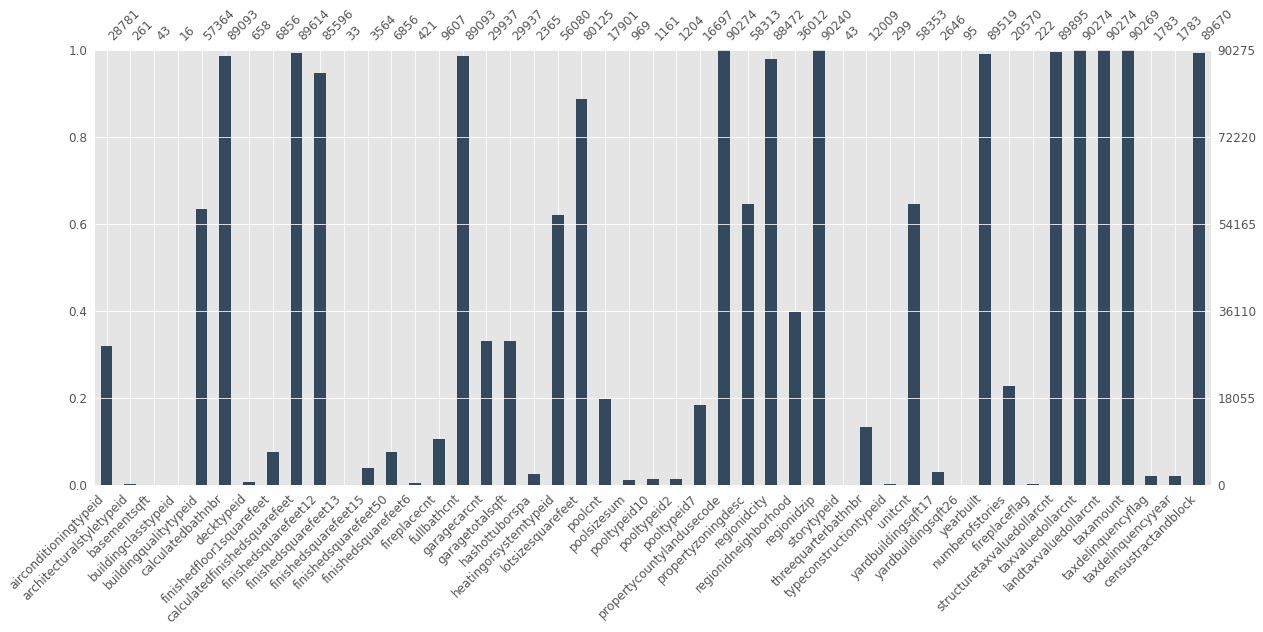

In [10]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

<AxesSubplot:>

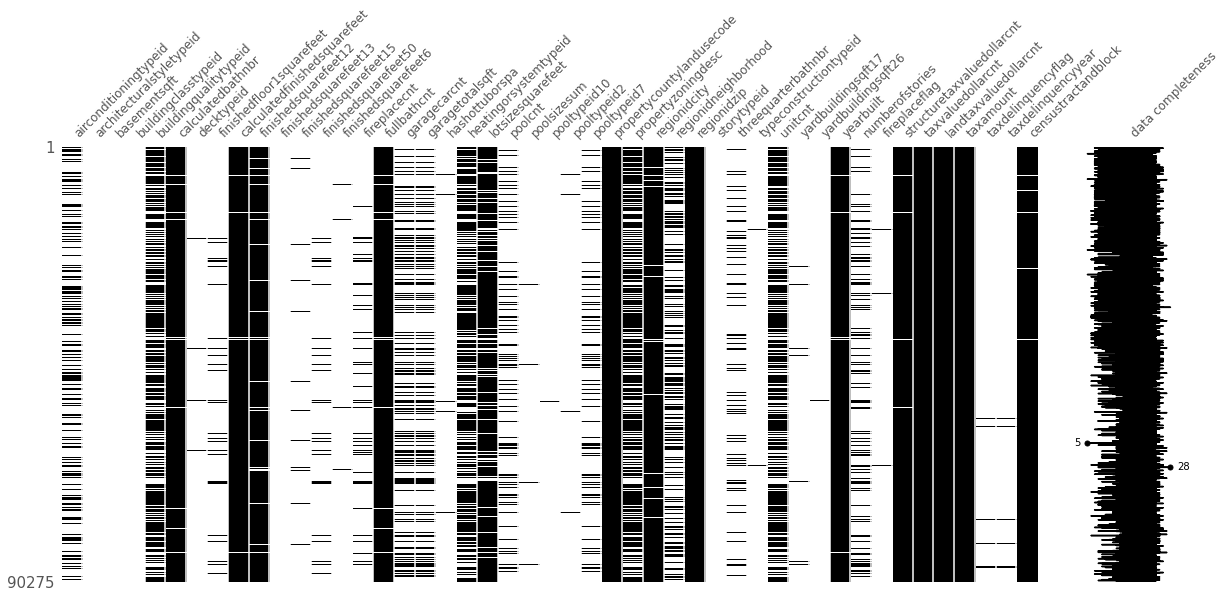

In [11]:
msno.matrix(merged[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

<AxesSubplot:>

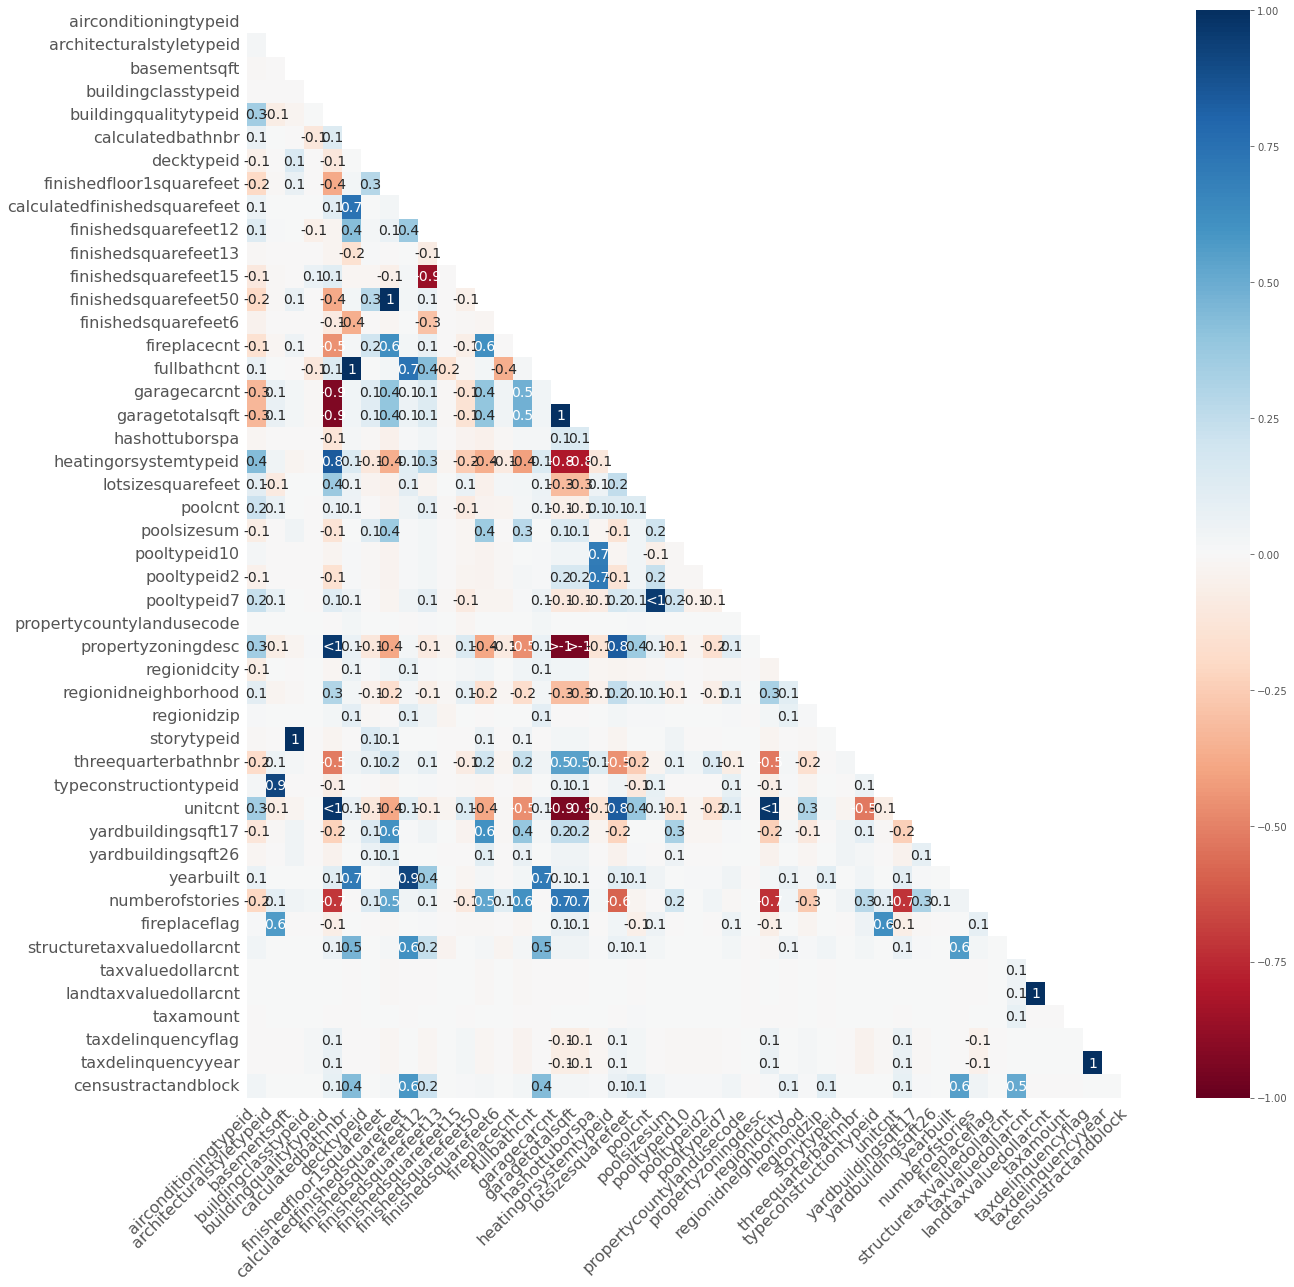

In [12]:
 msno.heatmap(merged[missingValueColumns],figsize=(20,20))

## Top Features Selection ##

In [13]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

mergedFilterd = merged.fillna(-999)
for f in mergedFilterd.columns:
    if mergedFilterd[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(mergedFilterd[f].values)) 
        mergedFilterd[f] = lbl.transform(list(mergedFilterd[f].values))
        
train_y = mergedFilterd.logerror.values
train_X = mergedFilterd.drop(["parcelid", "transactiondate", "logerror"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[14:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<AxesSubplot:xlabel='importance', ylabel='features'>

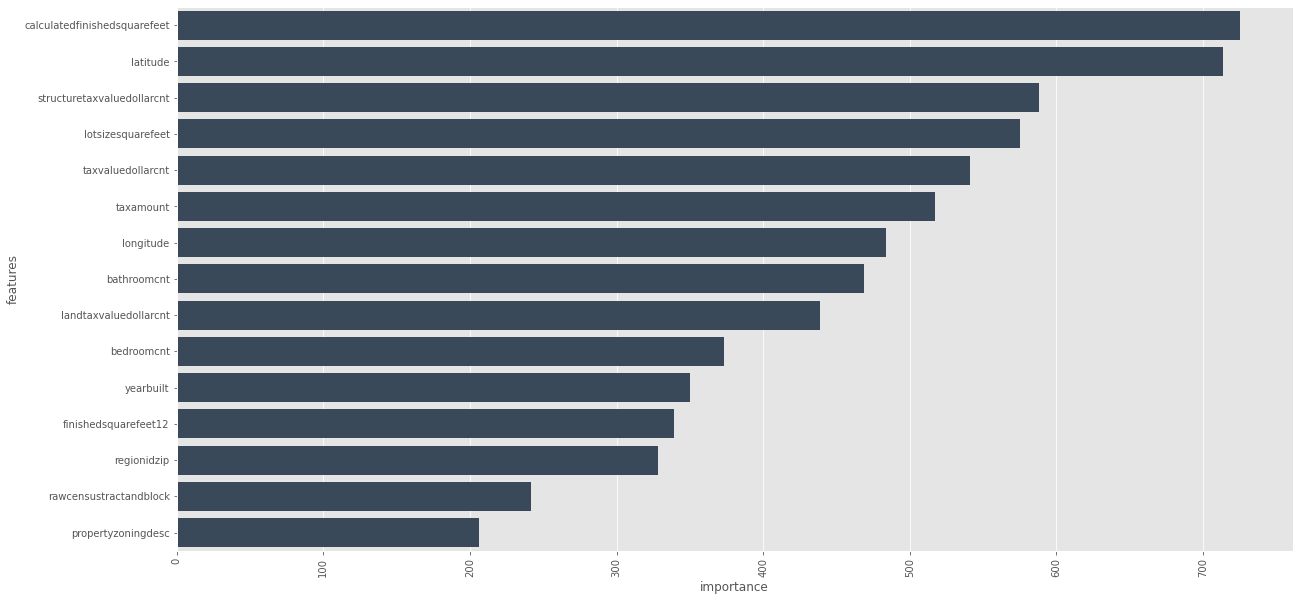

In [14]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#34495e")

## Correlation Analysis ##

<AxesSubplot:>

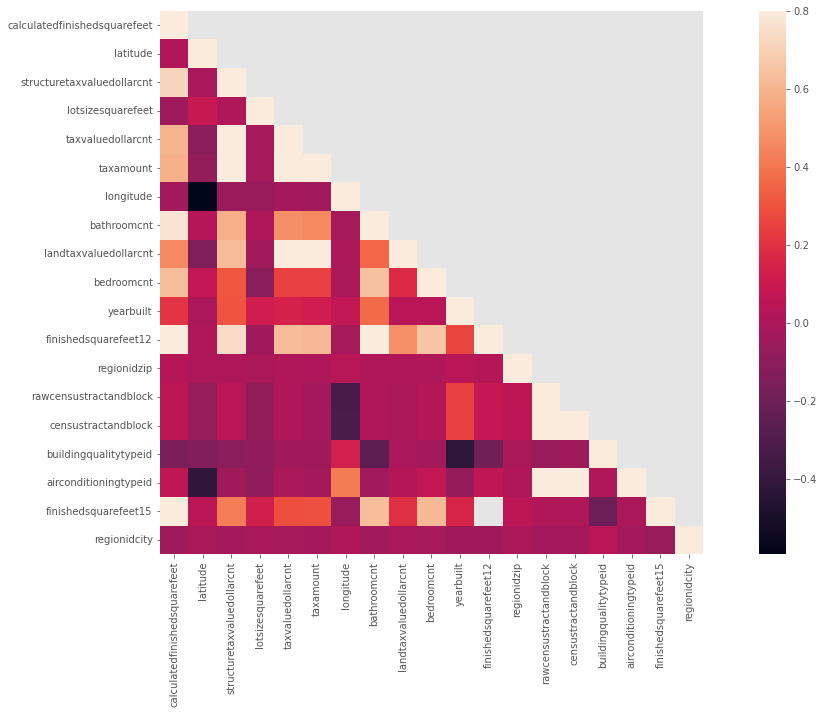

In [15]:
topFeatures = features["features"].tolist()[:20]
corrMatt = merged[topFeatures].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

## Multicollinearity Analysis(다중공선성) ##

[Text(0.5, 0, 'VIF Scores'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

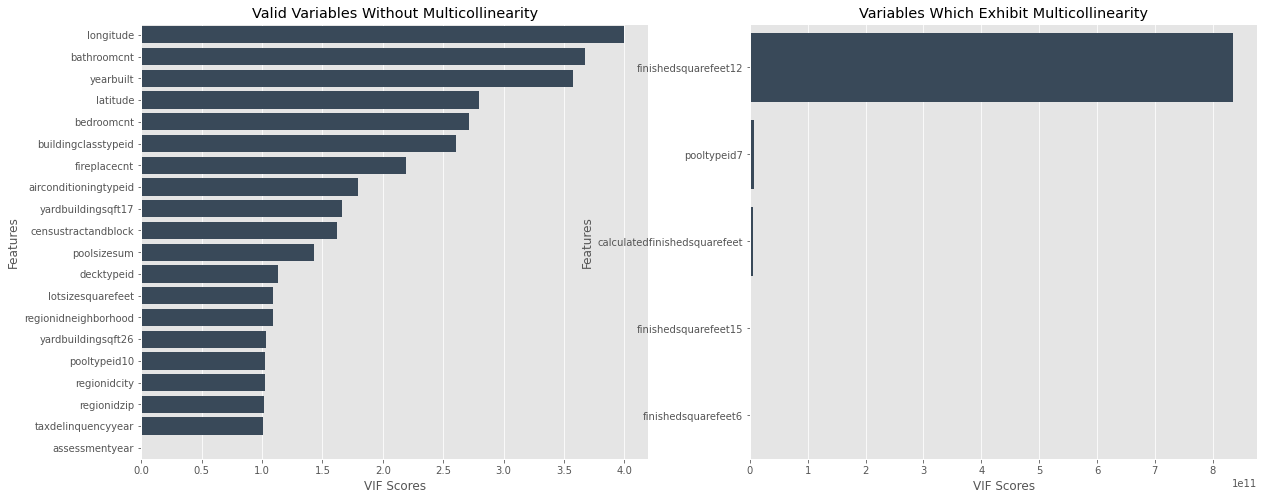

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X): # X = float64형 변수
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in merged.columns:
    #print (f)
    if merged[f].dtype!='object' and f not in ["parcelid", "transactiondate", "logerror"]:
        numericalCol.append(f)
mergedFilterd = merged[numericalCol].fillna(-999)
vifDict = calculate_vif_(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sn.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sn.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

## Univariate Analysis
** Dependent variable logerror follows nice normal distribution **

[Text(0.5, 0, 'logerror'),
 Text(0, 0.5, 'VIF Score'),
 Text(0.5, 1.0, 'Distribution Of Dependent Variable')]

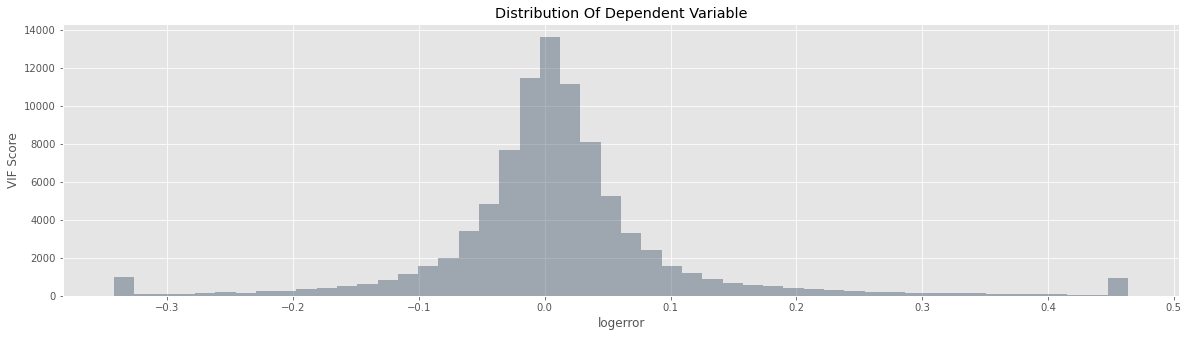

In [19]:
ulimit = np.percentile(merged.logerror.values, 99)
llimit = np.percentile(merged.logerror.values, 1)
merged['logerror'].loc[merged['logerror']>ulimit] = ulimit
merged['logerror'].loc[merged['logerror']<llimit] = llimit

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.distplot(merged.logerror.values, bins=50,kde=False,color="#34495e",ax=ax)
ax.set(xlabel='logerror', ylabel='VIF Score',title="Distribution Of Dependent Variable")

## Bivariate Analysis ##

[Text(0.5, 0, 'Month Of The Year'),
 Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 1.0, 'No Of Occurunces Across Month In 2016'),
 None]

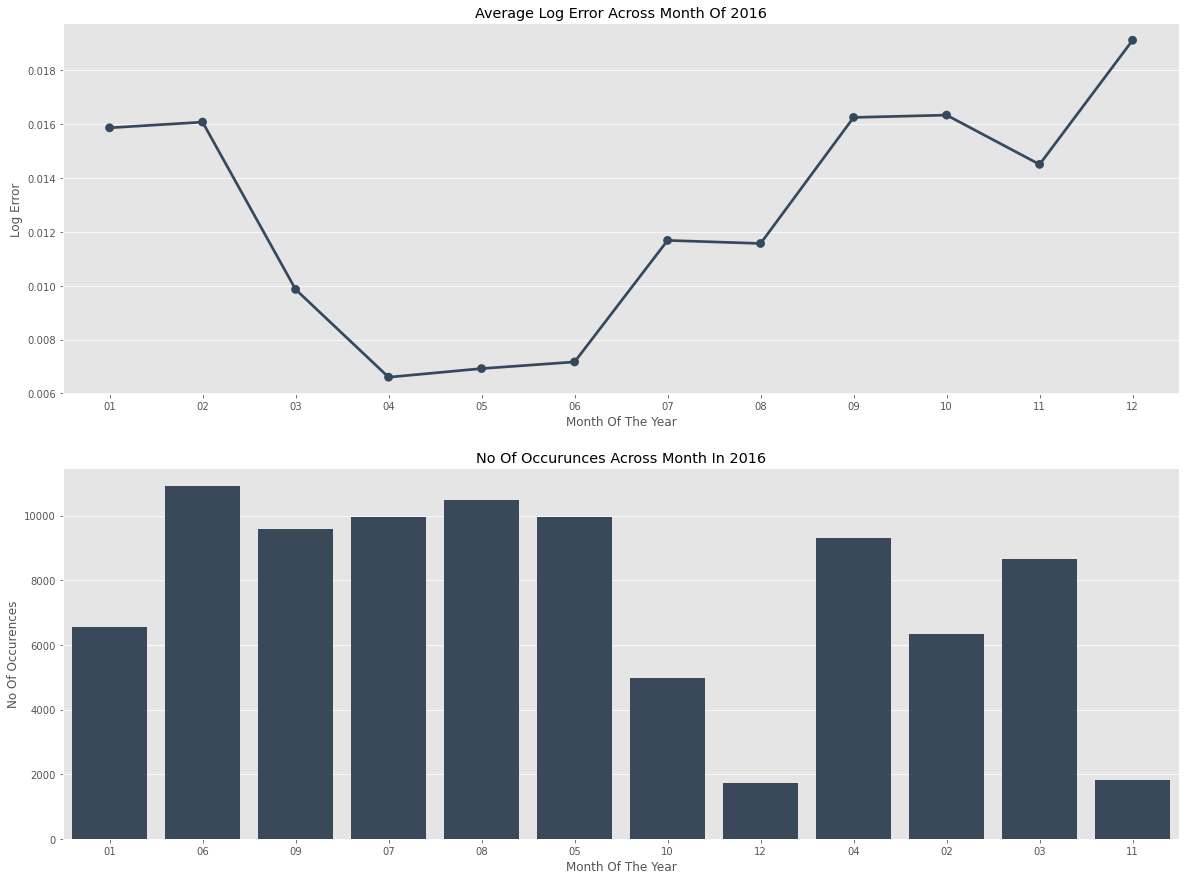

In [20]:
train["year"] = train.transactiondate.map(lambda x: str(x).split("-")[0])
train["month"] = train.transactiondate.map(lambda x: str(x).split("-")[1])
train["day"] = train.transactiondate.map(lambda x: str(x).split("-")[2].split()[0])

traingroupedMonth = train.groupby(["month"])["logerror"].mean().to_frame().reset_index()
traingroupedDay = train.groupby(["day"])["logerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)


sn.pointplot(x=traingroupedMonth["month"], y=traingroupedMonth["logerror"], data=traingroupedMonth, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Month Of The Year', ylabel='Log Error',title="Average Log Error Across Month Of 2016",label='big')

sn.countplot(x=train["month"], data=train,ax=ax2,color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2016",label='big')

[Text(0.5, 0, 'Day Of The Month'),
 Text(0, 0.5, 'No Of Occurences'),
 Text(0.5, 1.0, 'No Of Occurences Across Days Of The Month In 2016'),
 None]

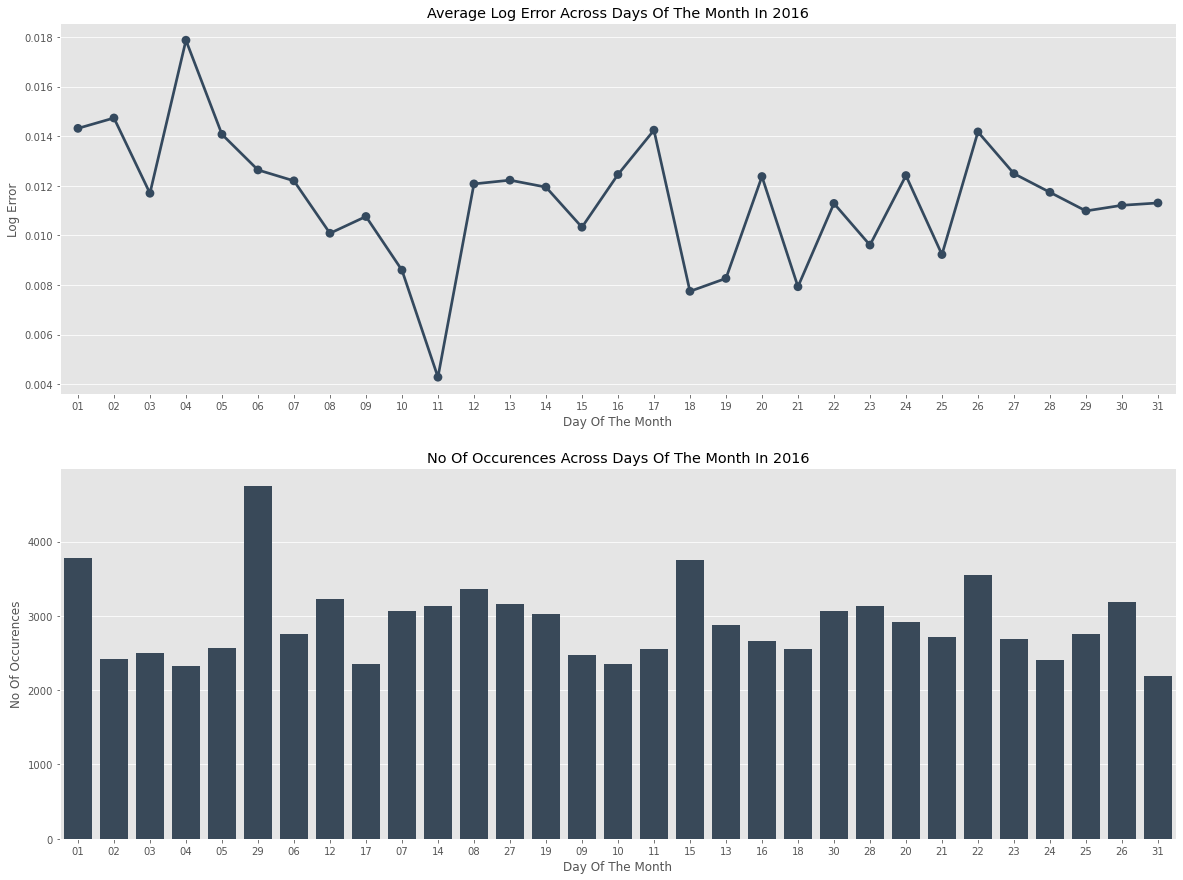

In [21]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)

sn.pointplot(x=traingroupedDay["day"], y=traingroupedDay["logerror"], data=traingroupedDay, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Day Of The Month', ylabel='Log Error',title="Average Log Error Across Days Of The Month In 2016",label='big')

sn.countplot(x=train["day"], data=train,ax=ax2,color="#34495e")
ax2.set(xlabel='Day Of The Month', ylabel='No Of Occurences',title="No Of Occurences Across Days Of The Month In 2016",label='big')

## 수년간 층수 ##
**1950년 이후 사람들이 2층 또는 3층 건물을 더 짓기 시작했다는 사실은 매우 흥미롭습니다**


<AxesSubplot:xlabel='yearbuilt'>

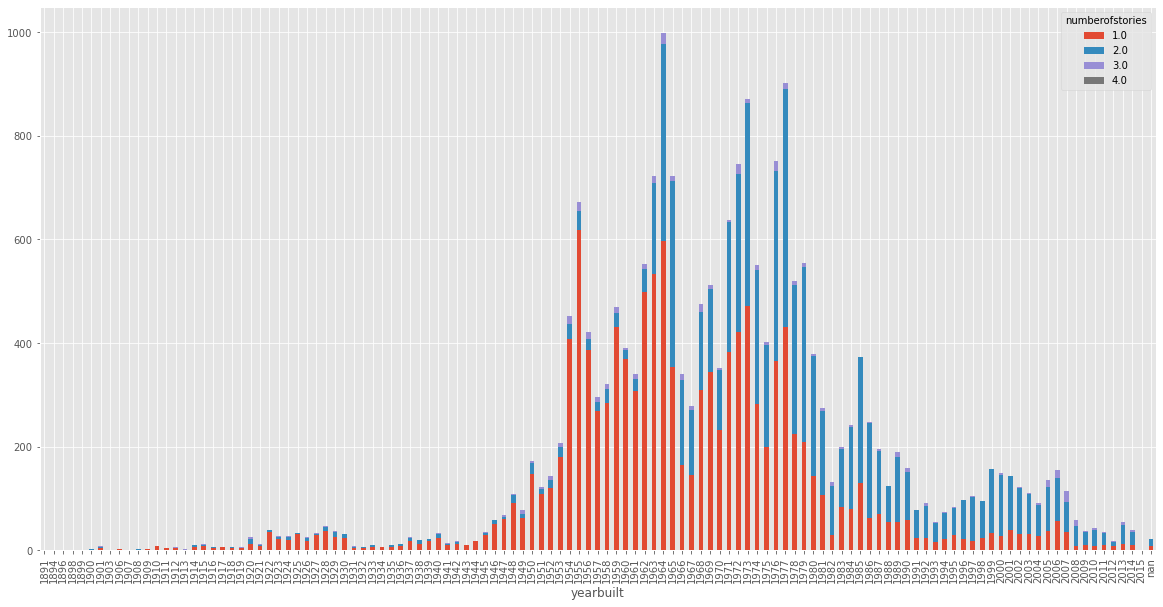

In [22]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
merged["yearbuilt"] = merged["yearbuilt"].map(lambda x:str(x).split(".")[0])
yearMerged = merged.groupby(['yearbuilt', 'numberofstories'])["parcelid"].count().unstack('numberofstories').fillna(0)
yearMerged.plot(kind='bar', stacked=True,ax=ax1)

In [23]:
cols = ["bathroomcnt","bedroomcnt","roomcnt","numberofstories","logerror","calculatedfinishedsquarefeet"]
mergedFiltered = merged[cols].dropna()
for col in cols:
    ulimit = np.percentile(mergedFiltered[col].values, 99.5)
    llimit = np.percentile(mergedFiltered[col].values, 0.5)
    mergedFiltered[col].loc[mergedFiltered[col]>ulimit] = ulimit
    mergedFiltered[col].loc[mergedFiltered[col]<llimit] = llimit

## Calculated Finished Square Feet Vs Log Error ##

<Figure size 576x576 with 0 Axes>

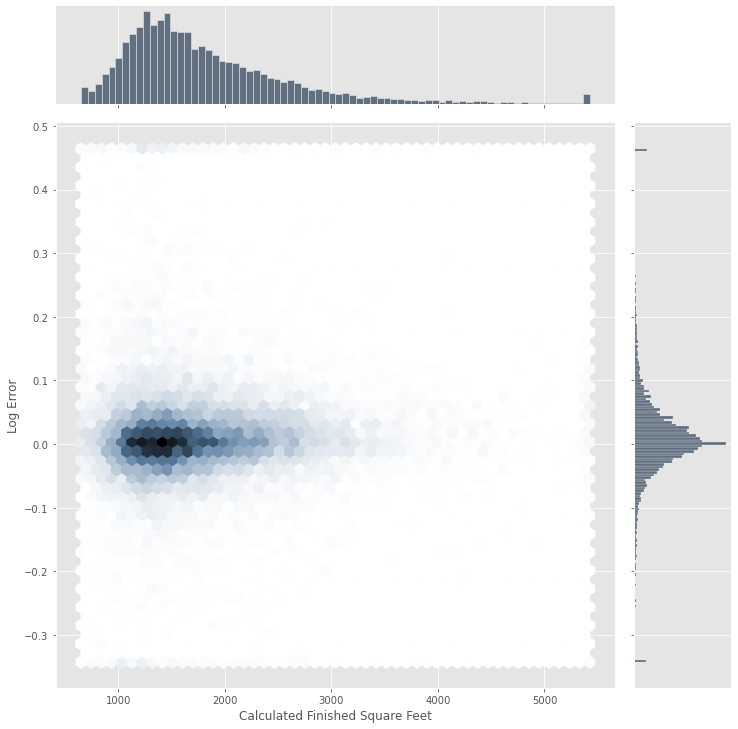

In [24]:
plt.figure(figsize=(8,8))
sn.jointplot(x=mergedFiltered.calculatedfinishedsquarefeet.values, y=mergedFiltered.logerror.values, size=10,kind="hex",color="#34495e")
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated Finished Square Feet', fontsize=12)
plt.show()

## Bedroom Count Vs Log Error ##

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Bedroom Count'),
 Text(0.5, 1.0, 'Bedroom Count Vs Log Error')]

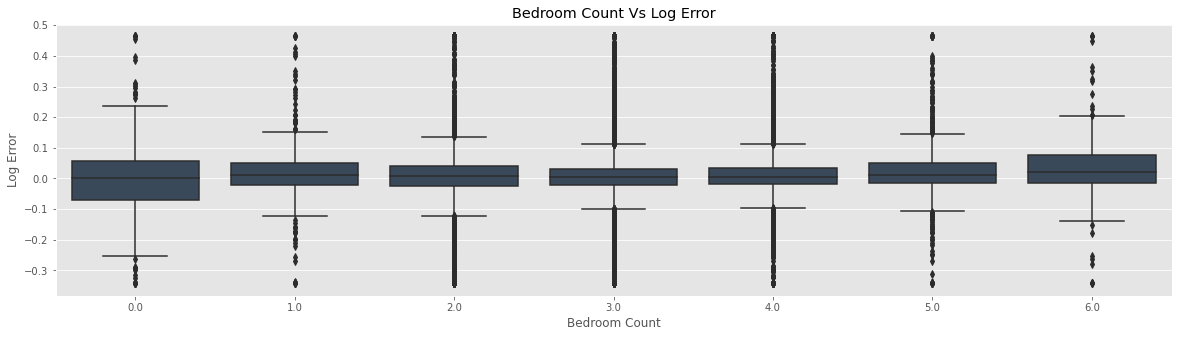

In [25]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="bedroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bedroom Count",title="Bedroom Count Vs Log Error")

## Bathroom Count Vs Log Error ##

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Bathroom Count'),
 Text(0.5, 1.0, 'Bathroom Count Vs Log Error')]

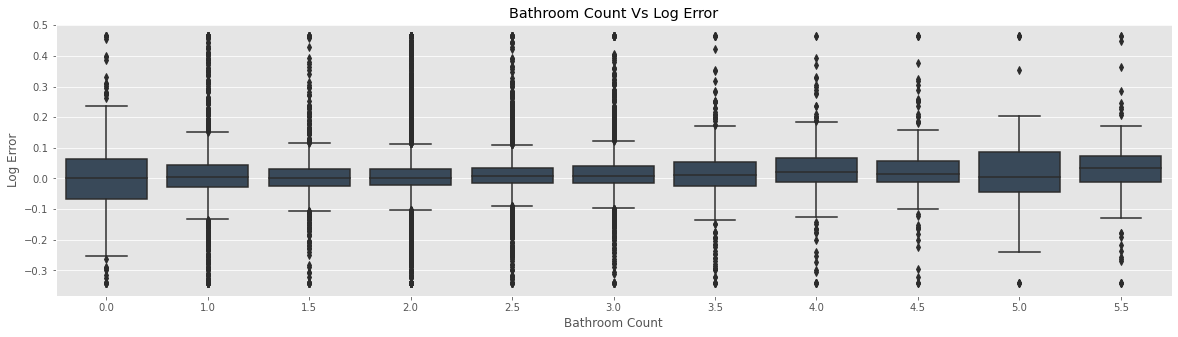

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="bathroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bathroom Count",title="Bathroom Count Vs Log Error")

## Room Count Vs Log Error  ##

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'Room Count'),
 Text(0.5, 1.0, 'Room Count Vs Log Error')]

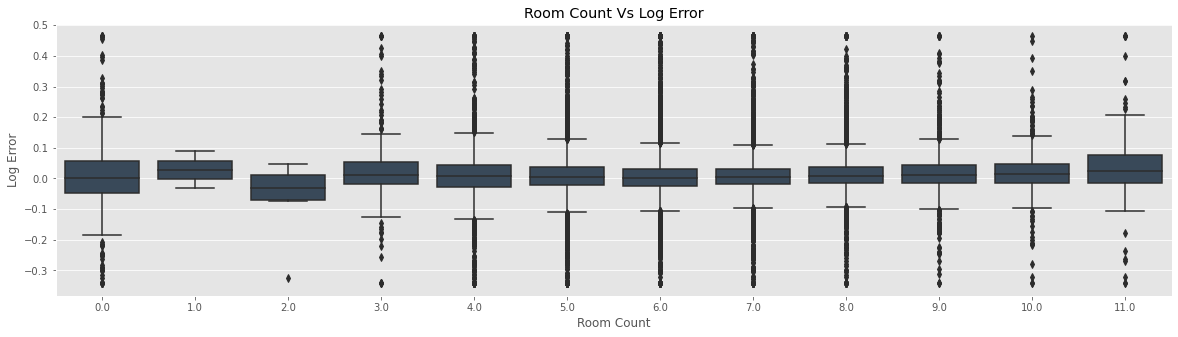

In [27]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="roomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Room Count",title="Room Count Vs Log Error")

## No Of Storeys Vs Log Error ##

[Text(0, 0.5, 'Log Error'),
 Text(0.5, 0, 'No Of Storeys'),
 Text(0.5, 1.0, 'No Of Storeys Vs Log Error')]

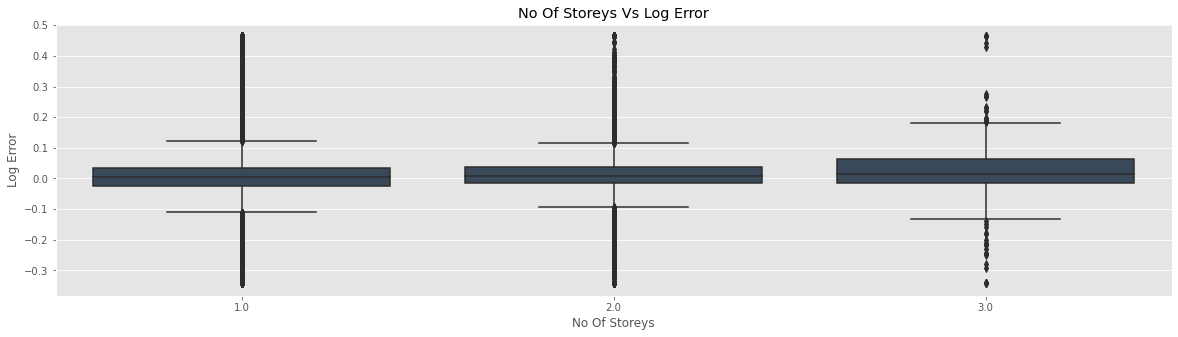

In [28]:
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.boxplot(x="numberofstories", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="No Of Storeys",title="No Of Storeys Vs Log Error")

## Bedroom Vs Bathroom Vs Log Error ##

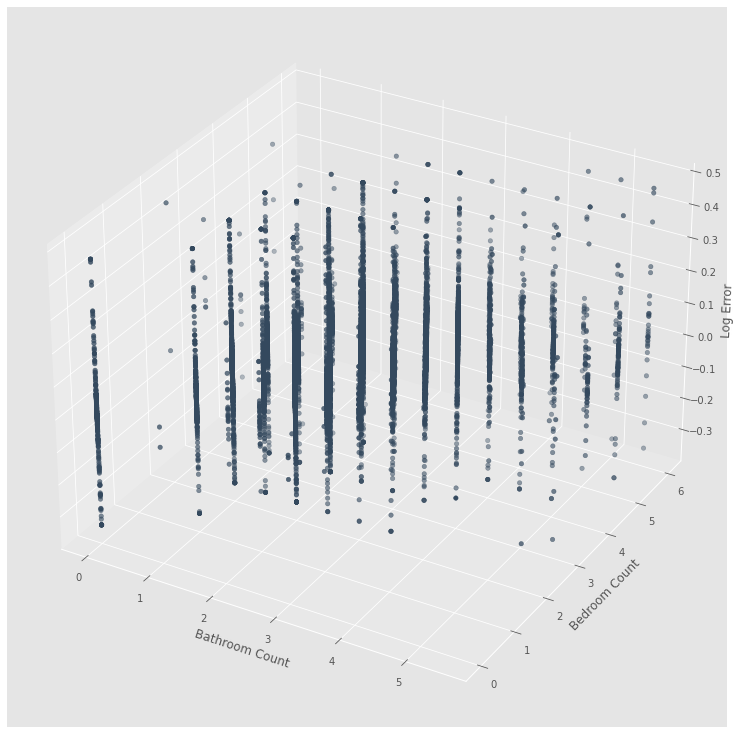

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
fig = pyplot.figure()
fig.set_size_inches(20,10)
ax = Axes3D(fig)

ax.scatter(mergedFiltered.bathroomcnt, mergedFiltered.bedroomcnt, mergedFiltered.logerror,color="#34495e")
ax.set_xlabel('Bathroom Count')
ax.set_ylabel('Bedroom Count')
ax.set_zlabel('Log Error');
pyplot.show()